In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
actions = [(-1, 0), (0, 1), (1, 0), (0, -1)]

In [3]:
def check_map(lake):
    q = [(0, 0)]
    visited = []
    while q:
        x, y = q.pop()
        visited.append((x, y))
        for dx, dy in actions:
            if (0 <= x + dx < lake.shape[0]) and (0 <= y + dy < lake.shape[1]):
                if (x + dx == lake.shape[0] - 1) and (y + dy == lake.shape[1] - 1):
                    return True
                if lake[x + dx, y + dy] and (x + dx, y + dy) not in visited:
                    q.append((x + dx, y + dy))
    return False

In [4]:
def generate_map(size=(5, 5), p=0.8):
    b = False
    while not b:
        lake = np.random.binomial(1, p, size)
        lake[0, 0] = 1
        lake[-1, -1] = 1
        b = check_map(lake)
    return lake

In [5]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [21]:
lake = generate_map()
theta = np.zeros(lake.shape + (4,))

In [22]:
def policy(s):
    x, y = s
    return softmax(theta[x, y, :])

In [23]:
n_epoches = 10000
T = 100
alpha = 0.1
rewards = []

In [24]:
for _ in range(n_epoches):
    s = (0, 0)
    t = 0
    reward = 0
    states = []
    acts = []
    while t < T:
        states.append(s)
        x, y = s
        action_idx = np.random.choice(range(len(actions)), p=policy(s))
        acts.append(action_idx)
        dx, dy = actions[action_idx]
        if (0 <= x + dx < lake.shape[0]) and (0 <= y + dy < lake.shape[1]):
            if (x + dx == lake.shape[0] - 1) and (y + dy == lake.shape[1] - 1):
                reward = 1
                break
            elif not lake[x + dx, y + dy]:
                reward = -1
                break
            else:
                s = (x + dx, y + dy)
        t += 1
    if reward:
        for s, action_idx in zip(states, acts):
            theta[s[0], s[1], action_idx] += alpha * reward * (1 - policy(s)[action_idx])
    rewards.append(reward)

In [25]:
from collections import Counter

In [26]:
c = Counter()
for r in rewards:
    c[r] += 1

In [27]:
c

Counter({-1: 531, 1: 9469})

In [28]:
theta

array([[[-1.92479450e+01, -2.27244352e+01,  2.73542609e+01,
          2.38984808e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-2.98204206e-01, -7.20681899e-02,  4.56416429e-01,
         -6.25763211e-01],
        [-2.21295018e-01,  1.46001635e-01, -7.15381273e-02,
         -2.01404243e-01]],

       [[-7.67815912e+00,  2.59065665e+01, -9.23799222e+00,
          2.22325102e+01],
        [-3.50845935e+00,  6.05750572e+01,  6.29985733e+01,
         -9.09999111e-01],
        [-1.85191270e+00,  7.45796105e+00,  9.62058337e+00,
         -3.56613832e-01],
        [ 1.57318277e-01,  1.29601852e+00,  3.35195795e+00,
          3.84661260e-01],
        [-2.04652566e-01, -9.51819221e-02,  1.99385956e+00,
          1.71303636e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 2.84991655e-01,  8.88640323e+

In [29]:
rewards_np = (np.array(rewards) + 1) / 2

In [30]:
cum_rewards = np.cumsum(rewards_np) / (np.arange(len(rewards)) + 1)

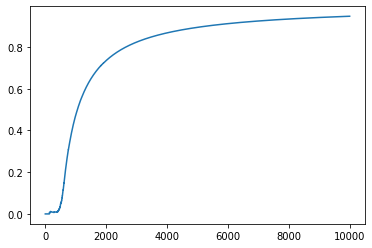

In [31]:
plt.plot(range(1, len(rewards) + 1), cum_rewards);